In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
#storing the data from a file path to the varriable
house_price_train_dataset_path = '/kaggle/input/hse-m-psmsimmo-p-347795-1-apartmentprice/train.csv'
house_price_train_dataset_table = pd.read_csv(house_price_train_dataset_path)
house_price_test_dataset_path = '/kaggle/input/hse-m-psmsimmo-p-347795-1-apartmentprice/test.csv'
house_price_test_dataset_table = pd.read_csv(house_price_test_dataset_path)

In [3]:
# #Deleting rows with empty cells in Age, District and Okrug
house_price_train_dataset_table = house_price_train_dataset_table.dropna(axis=0, subset=['Age', 'District','Okrug'])
house_price_test_dataset_table = house_price_test_dataset_table.dropna(axis=0, subset=['Age', 'District','Okrug'])
# replacing empty cells with unknown for train and test dataset
house_price_train_dataset_table = house_price_train_dataset_table.fillna("Unknown")
house_price_test_dataset_table = house_price_test_dataset_table.fillna("Unknown")
# converting categorical inputs to dummies for test and train data set
house_price_train_dataset_table = pd.get_dummies(house_price_train_dataset_table, columns=['Balcony','Walls','Age','Lift','District','Okrug'])
house_price_test_dataset_table = pd.get_dummies(house_price_test_dataset_table, columns=['Balcony','Walls','Age','Lift','District','Okrug'])
#Creating missing columns in test data
house_price_test_dataset_table.insert(loc=35, column='District_Внуково',value=0)

In [4]:
house_price_train_dataset_table.isnull().sum()
house_price_train_dataset_table.shape

(39611, 149)

In [5]:
house_price_test_dataset_table.isnull().sum()
house_price_test_dataset_table.shape

(9886, 148)

In [6]:
#a view of the first 5 rows of the no missing value train dataset
pd.set_option("display.max.columns", None)
house_price_train_dataset_table.head()

,Id,Room,Price,Size,Floor,FloorsTotal,Balcony_Unknown,Balcony_балкон,Balcony_лоджия,Walls_Unknown,Walls_блочный,Walls_кирпично-монолитный,Walls_кирпичный,Walls_монолитный,Walls_панельный дом,Age_вторичка,Age_новостройка,Lift_Unknown,Lift_грузовой,Lift_пассажирский,District_Академический,District_Алексеевский,District_Алтуфьевский,District_Арбат,District_Аэропорт,District_Бабушкинский,District_Басманный,District_Беговой,District_Бескудниковский,District_Бибирево,District_Бирюлёво Восточное,District_Бирюлёво Западное,District_Богородский,District_Братеево,District_Бутырский,District_Вешняки,District_Внуково,District_Войковский,District_Восточный,District_Гагаринский,District_Головинский,District_Гольяново,District_Даниловский,District_Дегунино Восточное,District_Дегунино Западное,District_Дмитровский,District_Донской,District_Дорогомилово,District_Жулебино,District_Замоскворечье,District_Зюзино,District_Зябликово,District_Ивановское,District_Измайлово,District_Измайлово Восточное,District_Капотня,District_Коньково,District_Коптево,District_Косино-Ухтомский,District_Котловка,District_Красносельский,District_Крылатский,District_Кузьминки,District_Кунцево,District_Куркино,District_Левобережный,District_Лефортово,District_Лианозово,District_Ломоносовский,District_Лосиноостровский,District_Люблино,District_Марфино,District_Марьина роща,District_Марьино,District_Медведково Южное,District_Метрогородок,District_Мещанский,District_Митино,District_Можайский,District_Молжаниновский,District_Москворечье-Сабурово,District_Нагатино Садовники,District_Нагатинский затон,District_Нагорный,District_Некрасовка,District_Нижегородский,District_Ново-Переделкино,District_Новогиреево,District_Новокосино,District_Обручевский,District_Останкино,District_Отрадное,District_Очаково-Матвеевское,District_Перово,District_Печатники,District_Покровское Стрешнево,District_Преображенский,District_Пресненский,District_Район Вернадского,District_Раменки,District_Ростокино,District_Рязанский,District_Савеловский,District_Свиблово,District_Северное Бутово,District_Северное Измайлово,District_Северное Медведково,District_Северное Орехово Борисово,District_Северное Тушино,District_Северное Чертаново,District_Северный,District_Сокол,District_Соколиная гора,District_Сокольники,District_Солнцево,District_Строгино,District_Таганка,District_Тверской,District_Текстильщики,District_Тимирязевский,District_Тропарево Никулино,District_Тёплый Стан,District_Филевский парк,District_Фили Давыдково,District_Хамовники,District_Ховрино,District_Хорошевский,District_Хорошёво-Мневники,District_Царицыно,District_Центральное Чертаново,District_Черемушки,District_Щукино,District_Южное Бутово,District_Южное Орехово Борисово,District_Южное Тушино,District_Южное Чертаново,District_Южнопортовый,District_Якиманка,District_Ярославский,District_Ясенево,Okrug_ВАО,Okrug_ЗАО,Okrug_САО,Okrug_СВАО,Okrug_СЗАО,Okrug_ЦАО,Okrug_ЮАО,Okrug_ЮВАО,Okrug_ЮЗАО
0,1,5,210020000.0,198,1,2,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,2,17630000.0,64,3,8,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,5,142400000.0,161,7,7,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,5,142520000.0,265,5,5,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
#a view of the first 5 rows of the test dataset
pd.set_option("display.max.columns", None)
house_price_test_dataset_table.head()

,Id,Room,Size,Floor,FloorsTotal,Balcony_Unknown,Balcony_балкон,Balcony_лоджия,Walls_Unknown,Walls_блочный,Walls_кирпично-монолитный,Walls_кирпичный,Walls_монолитный,Walls_панельный дом,Age_вторичка,Age_новостройка,Lift_Unknown,Lift_грузовой,Lift_пассажирский,District_Академический,District_Алексеевский,District_Алтуфьевский,District_Арбат,District_Аэропорт,District_Бабушкинский,District_Басманный,District_Беговой,District_Бескудниковский,District_Бибирево,District_Бирюлёво Восточное,District_Бирюлёво Западное,District_Богородский,District_Братеево,District_Бутырский,District_Вешняки,District_Внуково,District_Войковский,District_Восточный,District_Гагаринский,District_Головинский,District_Гольяново,District_Даниловский,District_Дегунино Восточное,District_Дегунино Западное,District_Дмитровский,District_Донской,District_Дорогомилово,District_Жулебино,District_Замоскворечье,District_Зюзино,District_Зябликово,District_Ивановское,District_Измайлово,District_Измайлово Восточное,District_Капотня,District_Коньково,District_Коптево,District_Косино-Ухтомский,District_Котловка,District_Красносельский,District_Крылатский,District_Кузьминки,District_Кунцево,District_Куркино,District_Левобережный,District_Лефортово,District_Лианозово,District_Ломоносовский,District_Лосиноостровский,District_Люблино,District_Марфино,District_Марьина роща,District_Марьино,District_Медведково Южное,District_Метрогородок,District_Мещанский,District_Митино,District_Можайский,District_Молжаниновский,District_Москворечье-Сабурово,District_Нагатино Садовники,District_Нагатинский затон,District_Нагорный,District_Некрасовка,District_Нижегородский,District_Ново-Переделкино,District_Новогиреево,District_Новокосино,District_Обручевский,District_Останкино,District_Отрадное,District_Очаково-Матвеевское,District_Перово,District_Печатники,District_Покровское Стрешнево,District_Преображенский,District_Пресненский,District_Район Вернадского,District_Раменки,District_Ростокино,District_Рязанский,District_Савеловский,District_Свиблово,District_Северное Бутово,District_Северное Измайлово,District_Северное Медведково,District_Северное Орехово Борисово,District_Северное Тушино,District_Северное Чертаново,District_Северный,District_Сокол,District_Соколиная гора,District_Сокольники,District_Солнцево,District_Строгино,District_Таганка,District_Тверской,District_Текстильщики,District_Тимирязевский,District_Тропарево Никулино,District_Тёплый Стан,District_Филевский парк,District_Фили Давыдково,District_Хамовники,District_Ховрино,District_Хорошевский,District_Хорошёво-Мневники,District_Царицыно,District_Центральное Чертаново,District_Черемушки,District_Щукино,District_Южное Бутово,District_Южное Орехово Борисово,District_Южное Тушино,District_Южное Чертаново,District_Южнопортовый,District_Якиманка,District_Ярославский,District_Ясенево,Okrug_ВАО,Okrug_ЗАО,Okrug_САО,Okrug_СВАО,Okrug_СЗАО,Okrug_ЦАО,Okrug_ЮАО,Okrug_ЮВАО,Okrug_ЮЗАО
0,40509,2,58,2,5,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,40510,5,266,3,14,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,40511,5,197,5,9,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,40512,5,233,3,14,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

<AxesSubplot:>

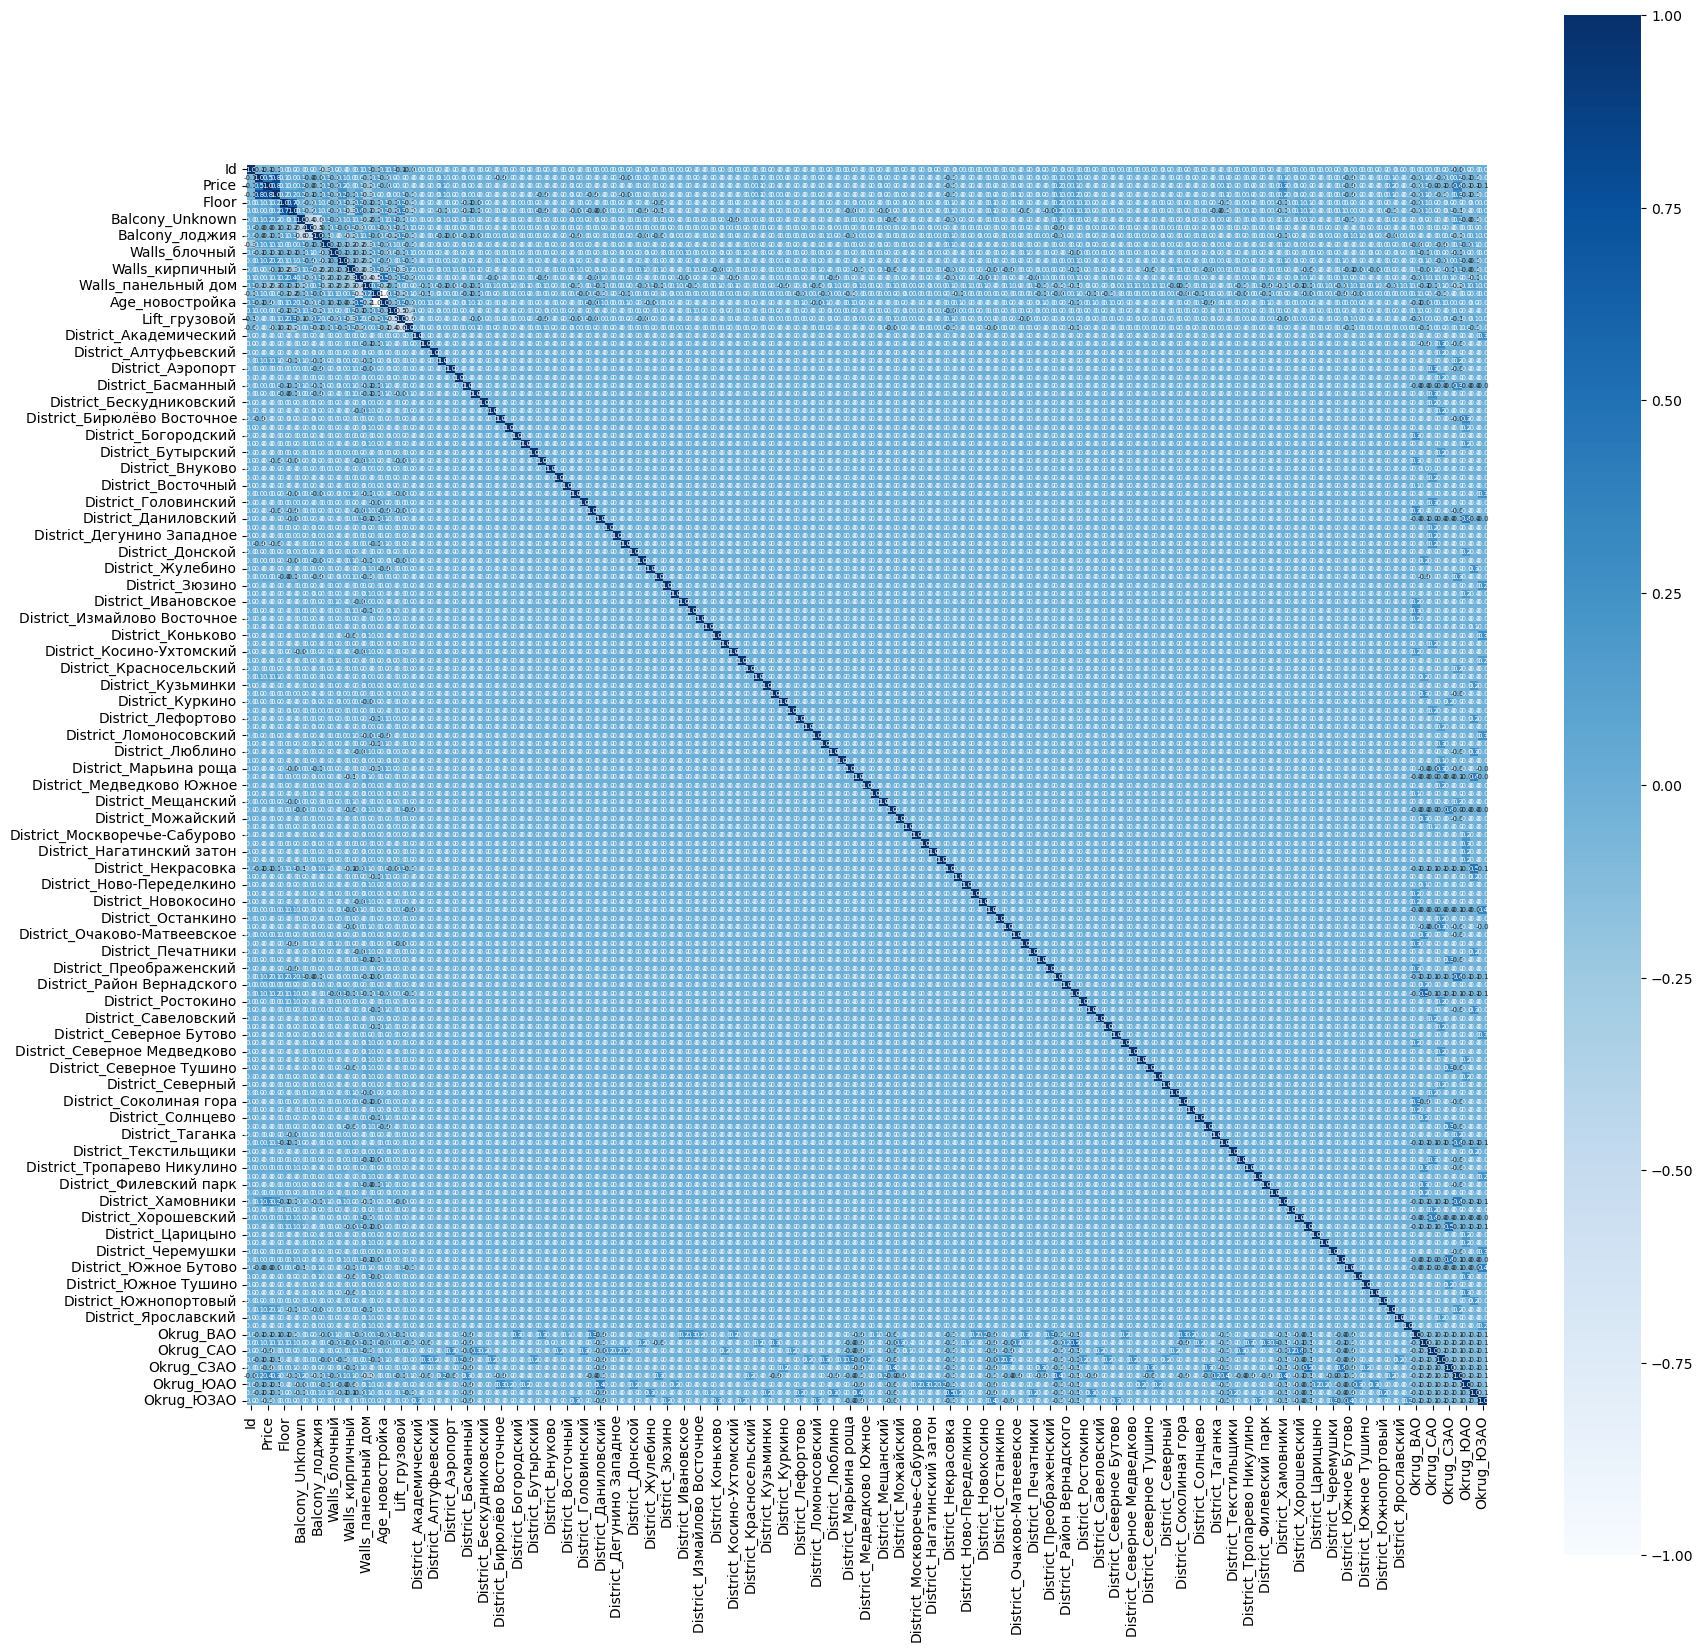

In [8]:
#undferstanding the correlation between the various features in the data(positive or negative)
correlation=house_price_train_dataset_table.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':5}, cmap='Blues')


In [9]:
# spliting the data
x_train=house_price_train_dataset_table.drop(['Price'], axis=1)
y_train=house_price_train_dataset_table['Price']
x_test=house_price_test_dataset_table
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
# print(X.shape, X_train.shape, X_test.shape )

In [10]:
# training the data
model=XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [11]:
# predicting the data
test_data_prediction=model.predict(x_test)
# checking errors with R Sqaured and mean absolute error
# score_1=metrics.r2_score(Y_train, training_data_prediction)
# score_2=metrics.mean_absolute_error(Y_train, training_data_prediction)
# print('R square error: ', score_1)
# print('mean absolute error: ', score_2)
test_data_prediction=pd.DataFrame(test_data_prediction)
test_data_prediction.insert(loc=0, column='Id', value=range(0,len(test_data_prediction)))
test_data_prediction.rename(columns = {0:'Price'}, inplace = True)
# pd.set_option('display.max_rows', None)
test_data_prediction.to_csv(f"Submission_file_oct-2021.csv")
print(test_data_prediction)

        Id        Price
0        0    9339149.0
1        1  235113200.0
2        2  129882680.0
3        3  205890320.0
4        4   30016840.0
...    ...          ...
9881  9881   12203666.0
9882  9882   11413132.0
9883  9883    5589207.0
9884  9884   10577529.0
9885  9885    9395534.0

[9886 rows x 2 columns]


In [12]:
# #a view of the train data set
# print(house_price_train_dataset_table)

In [13]:
# #a view of the first 5 rows of the train dataset
# house_price_train_dataset_table.head()

In [14]:
# #a view of the test data set
# print(house_price_test_dataset_table)

In [15]:
# #a view of the first 5 rows of the test dataset
# house_price_test_dataset_table.head()

In [16]:
# #number of attribute cells without inputs
# house_price_train_dataset_table.isnull().sum()

In [17]:
#code to view the different attributes of each feature
# house_price_train_dataset_table['Wall'].value_counts()

In [18]:
# code to select particular columns of a pandas table
# q=house_price_train_dataset_table.iloc[:, [2,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]]
# print(q)

In [19]:
house_price_test_dataset_table.isnull().sum()

Id             0
Room           0
Size           0
Floor          0
FloorsTotal    0
              ..
Okrug_СЗАО     0
Okrug_ЦАО      0
Okrug_ЮАО      0
Okrug_ЮВАО     0
Okrug_ЮЗАО     0
Length: 148, dtype: int64

In [20]:
house_price_train_dataset_table.isnull().sum()

Id            0
Room          0
Price         0
Size          0
Floor         0
             ..
Okrug_СЗАО    0
Okrug_ЦАО     0
Okrug_ЮАО     0
Okrug_ЮВАО    0
Okrug_ЮЗАО    0
Length: 149, dtype: int64